In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
spams = pd.read_csv(r'C:\Users\acer\Downloads\spam.csv', encoding="latin-1")
#/Users/da_learner_mac_45/Downloads
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [108]:
spams.shape

(5572, 5)

In [109]:
spams.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Name the columns accordingly

In [110]:
spams.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [111]:
non_spam_ratio = round(len(spams[spams['v1'] == 'ham'])/len(spams['v1']) * 100, 2)
spam_ratio = round(len(spams[spams['v1'] == 'spam'])/len(spams['v1']) * 100, 2)

# Print the ratios
print("Not a Spam Email Ratio with label(0):", non_spam_ratio, "%")
print("Spam Email Ratio with label(1):", spam_ratio, "%")

Not a Spam Email Ratio with label(0): 86.59 %
Spam Email Ratio with label(1): 13.41 %


In [112]:
spams['length'] = spams.v2.str.len()
spams.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


DATA ANALYSIS

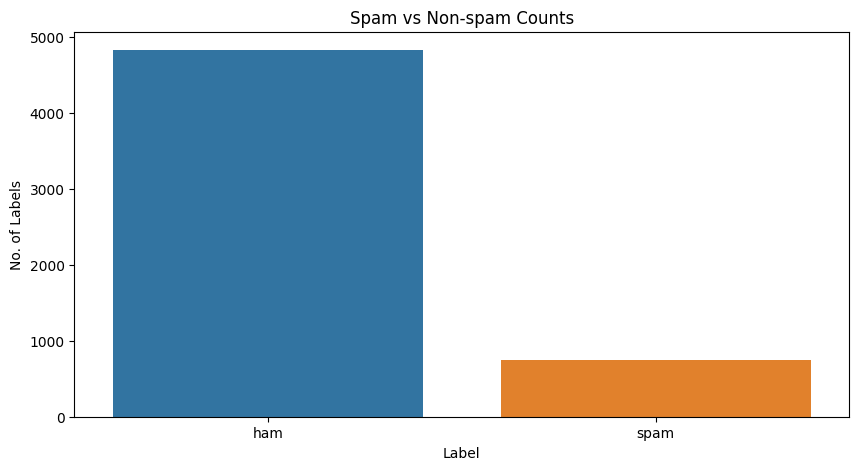

In [113]:

plt.figure(figsize=(10,5))
sns.countplot(x='v1', data=spams)
plt.xlabel('Label')
plt.ylabel('No. of Labels')
plt.title('Spam vs Non-spam Counts')
plt.show()

In [114]:
spams['label'] = spams['v1'].map({'ham': 0, 'spam': 1})
spams['message']=spams['v2']
spams.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4','v1','v2'], axis=1, inplace=True)
#Converting all messages in column v2 to lower case
spams['message'] = spams['message'].str.lower()
spams.head()


,length,label,message
0,111,0,"go until jurong point, crazy.. available only ..."
1,29,0,ok lar... joking wif u oni...
2,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,49,0,u dun say so early hor... u c already then say...
4,61,0,"nah i don't think he goes to usf, he lives aro..."


BALANCE DATA

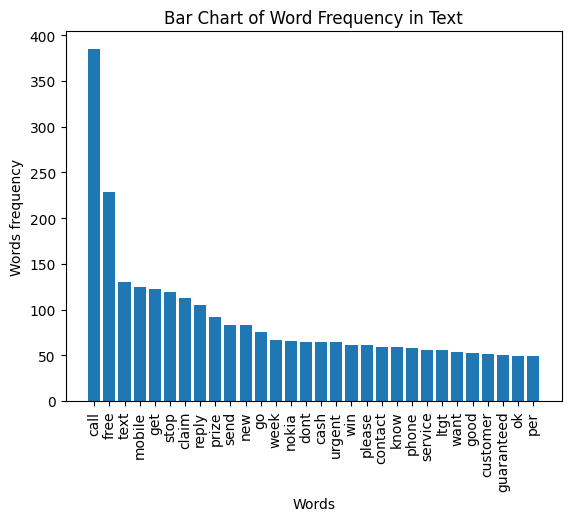

In [115]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english')+ ['it','u','16','2','4','ur','txt','im','r'])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['message'] = data['message'].apply(preprocess)

# Tokenize the preprocessed text data
tokenized_text = [word for email in data['message'] for word in email.split()]

# Create a frequency distribution of the tokens
freq_dist = nltk.FreqDist(tokenized_text)

# Get the most common words and their counts
most_common_words = freq_dist.most_common(30)
words = [word[0] for word in most_common_words]
counts = [word[1] for word in most_common_words]

# Create a bar plot of the most common words
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Words frequency')
plt.title('Bar Chart of Word Frequency in Text')
plt.show()


In [116]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
spams['num_characters']=spams['message'].apply(len)
spams.head()

,length,label,message,num_characters
0,111,0,"go until jurong point, crazy.. available only ...",111
1,29,0,ok lar... joking wif u oni...,29
2,155,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,49,0,u dun say so early hor... u c already then say...,49
4,61,0,"nah i don't think he goes to usf, he lives aro...",61


In [118]:
from nltk.tokenize import word_tokenize
spams['message'].apply(lambda x: nltk.word_tokenize(x))

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, ì_, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [119]:
spams['num_words']=spams['message'].apply(lambda x:len(nltk.word_tokenize(x)))
spams.sample(5)

,length,label,message,num_characters,num_words
163,152,1,-pls stop bootydelious (32/f) is inviting you ...,152,29
4280,152,0,"wn u r hurt by d prsn who s close 2 u, do figh...",152,37
2679,136,1,"new tones this week include: 1)mcfly-all ab..,...",136,29
810,26,0,s:)s.nervous &lt;#&gt; :),26,13
5090,24,0,"st andre, virgil's cream",24,6


In [120]:
spams['num_sentences']=spams['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [121]:
ham=spams[spams["label"]==0]
spam=spams[spams["label"]==1]

C:\Users\acer\AppData\Local\Temp\ipykernel_10100\3602637933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spams.corr(),annot=True)


<Axes: >

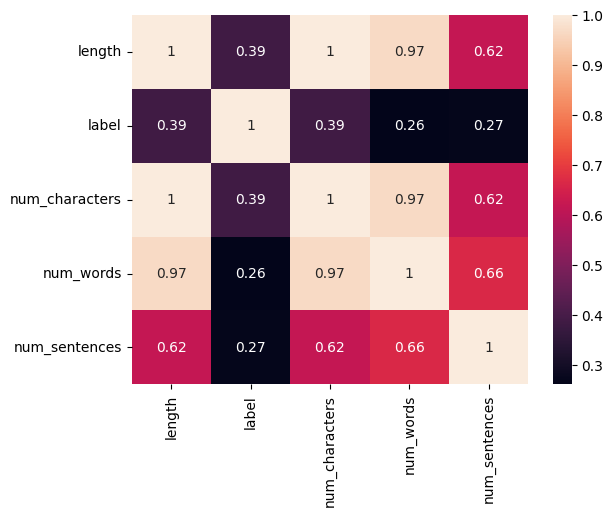

In [122]:
#plotting a heatmap for the correlation
sns.heatmap(spams.corr(),annot=True)

In [123]:
ham.shape,spam.shape

((4825, 6), (747, 6))

In [124]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 6)

In [125]:
data=spam.append(ham,ignore_index=True)
print("Shape :",data.shape)
data.head()

Shape : (1494, 6)


C:\Users\acer\AppData\Local\Temp\ipykernel_10100\1966939139.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=spam.append(ham,ignore_index=True)


,length,label,message,num_characters,num_words,num_sentences
0,155,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
1,148,1,freemsg hey there darling it's been 3 week's n...,148,39,4
2,158,1,winner!! as a valued network customer you have...,158,31,4
3,154,1,had your mobile 11 months or more? u r entitle...,154,31,3
4,136,1,"six chances to win cash! from 100 to 20,000 po...",136,30,2


<Axes: ylabel='count'>

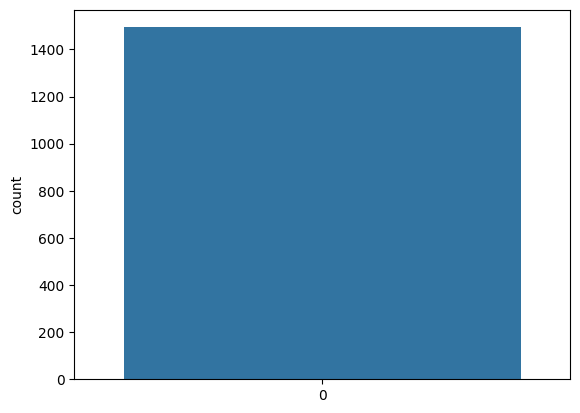

In [126]:
sns.countplot(data["label"])

REGULAR EXPRESSION

In [127]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [128]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from nltk.stem import LancasterStemmer, SnowballStemmer

# Define stemmers
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

# Define vectorizers
tfidf = TfidfVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))
hashing = HashingVectorizer(stop_words='english', tokenizer=lambda text: snowball.stem(lancaster.stem(text)))

# Generate feature vectors
X_tfidf = tfidf.fit_transform(spam['message'])
X_hashing = hashing.fit_transform(spam['message'])
y = spams['label']


c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


WORD CLOUD

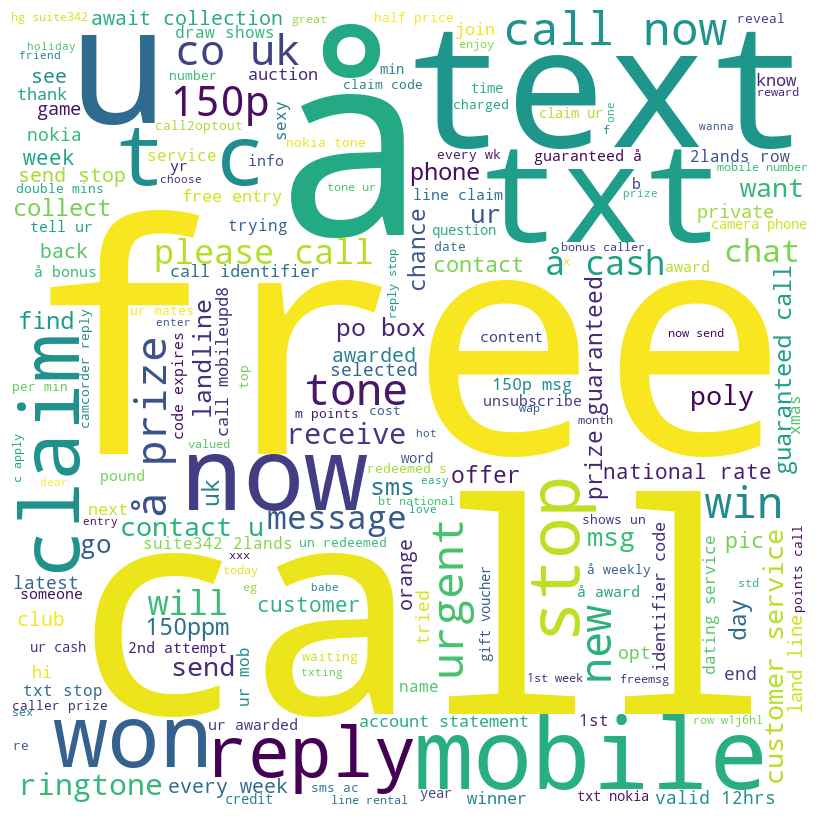

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single string
all_messages = ' '.join(spam['message'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_messages)

# Plot the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


MODEL BUILDING

In [132]:
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam.message)
y = spam.label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the model
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CLASSIFICATION REPORT

In [133]:
# Evaluate the model on the training set
y_train_pred = nb.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       597

    accuracy                           1.00       597
   macro avg       1.00      1.00      1.00       597
weighted avg       1.00      1.00      1.00       597



In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



CONFUSION MATRIX

Confusion matrix:
 [[150]]


C:\Users\acer\AppData\Local\Temp\ipykernel_10100\515965696.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\acer\AppData\Local\Temp\ipykernel_10100\515965696.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


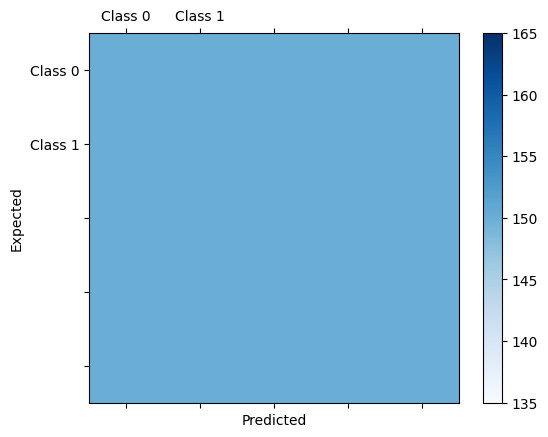

In [135]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()